# CEO Dismissal Dataset
### Cleaned and analyzed by Joshua Ye for Professor Oz
### October 22, 2021

In [67]:
# Import necessary libraries
import pandas as pd

# Reading ceo_dismissal csv
ceo_dismissal = pd.read_csv("CEO Dismissal Data 2021.02.03.xlsx - Sheet1.csv")

# CEO Dismissal Dataset Cleaning
### Steps outlined below:

In [77]:
# Renamed columns to proper name according to data dictionary
ceo_dismissal = ceo_dismissal.rename({"year": "fyear", "Departure Code": "departure_code", "Interim & Co-CEO": "interim_coceo", "The fiscal year during which the CEO exited - for clarity": "fyear_gone", "Still There": "still_there", "Notes and Thoughts": "notes", "Notes 2": "sources", "tenure_no": "tenure_no_ceodb"}, axis=1)

# Standardized the following columns to Int64 instead of float64
ceo_dismissal["departure_code"] = ceo_dismissal["departure_code"].astype("Int64")
ceo_dismissal["ceo_dismissal"] = ceo_dismissal["ceo_dismissal"].astype("Int64")
ceo_dismissal["fyear_gone"] = ceo_dismissal["fyear_gone"].astype("Int64")

# Dropped invalid observation
ceo_dismissal = ceo_dismissal.drop(ceo_dismissal[ceo_dismissal.fyear == 2109].index)

ceo_dismissal

,dismissal_dataset_id,coname,gvkey,fyear,co_per_rol,exec_fullname,departure_code,ceo_dismissal,interim_coceo,tenure_no_ceodb,max_tenure_ceodb,fyear_gone,leftofc,still_there,notes,sources
0,1,AAR CORP,1004,1995,5622,Ira A. Eichner,5,0,NaN,1,1,1996,10/1/1996,NaN,Mr. Ira A. Eichner served as CEO until October...,https://www.comparably.com/companies/aar-corp/...
1,2,AAR CORP,1004,2017,5623,David P. Storch,5,0,NaN,1,1,2018,5/31/2018,NaN,Agreed to stay as non-executive chairman post ...,https://advance-lexis-com.umiss.idm.oclc.org/a...
2,3,AAR CORP,1004,2018,51547,"John McClain Holmes, III",<NA>,<NA>,NaN,1,1,<NA>,NaN,17nov2020,NaN,https://www.aarcorp.com/about/corporate-officers/
3,4,ADC TELECOMMUNICATIONS INC,1013,2000,2611,William J. Cadogan,6,0,NaN,1,1,2001,2/15/2001,NaN,"William Cadogan, the retiring CEO and chairman...",https://www.bizjournals.com/twincities/stories...
4,5,ADC TELECOMMUNICATIONS INC,1013,2003,23275,Richard R. Roscitt,6,0,NaN,1,1,2003,8/13/2003,NaN,"Richard R. ""Rick"" Roscitt has accepted a new p...",https://www.businesswire.com/news/home/2003081...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,9025,LYONDELLBASELL INDUSTRIES NV,294524,2017,46408,Bhavesh V. Patel,<NA>,<NA>,NaN,1,1,<NA>,NaN,03feb2021,NaN,NaN
9386,9026,ALLEGION PLC,316056,2017,48314,David D. Petratis,<NA>,<NA>,NaN,1,1,<NA>,NaN,03feb2021,NaN,NaN
9387,9027,DORIAN LPG LTD,317264,2019,63143,John C. Hadjipateras,<NA>,<NA>,NaN,1,1,<NA>,NaN,03feb2021,NaN,https://dorianlpg.com/about/management/default...
9388,9028,NVENT ELECTRIC PLC,326688,2019,62002,Beth A. Wozniak,<NA>,<NA>,NaN,1,1,<NA>,NaN,03feb2021,NaN,https://www.nvent.com/en-us/about-nvent/execut...


# CEO Dismissal Descriptive Statistics
### By overall and year:

In [69]:
# Overall descriptive statistics
ceo_dismissal[["departure_code", "tenure_no_ceodb", "max_tenure_ceodb"]].describe().round(2)

,departure_code,tenure_no_ceodb,max_tenure_ceodb
count,7720.00,9389.00,9389.00
mean,5.22,1.03,1.05
std,1.50,0.17,0.23
min,1.00,1.00,1.00
25%,5.00,1.00,1.00
50%,5.00,1.00,1.00
75%,7.00,1.00,1.00
max,9.00,4.00,4.00


In [70]:
# Descriptive statistics by year
for year in range(1987, 2020):
    if not ceo_dismissal[ceo_dismissal.fyear == year].empty:
        print("\nDescriptive statistics for", year)
        print(ceo_dismissal[["departure_code", "tenure_no_ceodb", "max_tenure_ceodb"]][ceo_dismissal.fyear == year].describe().round(2))


Descriptive statistics for 1987
      departure_code  tenure_no_ceodb  max_tenure_ceodb
count              1              1.0               1.0
mean             5.0              1.0               2.0
std             <NA>              NaN               NaN
min                5              1.0               2.0
25%                5              1.0               2.0
50%                5              1.0               2.0
75%                5              1.0               2.0
max                5              1.0               2.0

Descriptive statistics for 1992
       departure_code  tenure_no_ceodb  max_tenure_ceodb
count           58.00             58.0             58.00
mean             4.78              1.0              1.03
std              0.94              0.0              0.18
min              1.00              1.0              1.00
25%              5.00              1.0              1.00
50%              5.00              1.0              1.00
75%              5.00          

max              9.00             3.00              3.00

Descriptive statistics for 2013
       departure_code  tenure_no_ceodb  max_tenure_ceodb
count          259.00           261.00            261.00
mean             5.18             1.02              1.03
std              1.45             0.12              0.18
min              1.00             1.00              1.00
25%              5.00             1.00              1.00
50%              5.00             1.00              1.00
75%              7.00             1.00              1.00
max              9.00             2.00              2.00

Descriptive statistics for 2014
       departure_code  tenure_no_ceodb  max_tenure_ceodb
count          307.00           312.00            312.00
mean             5.14             1.02              1.05
std              1.53             0.15              0.23
min              1.00             1.00              1.00
25%              5.00             1.00              1.00
50%              5.00 

# CEO Dismissal Frequency Plots
### By fyear, fyear_gone, departure_code, tenure_no_ceodb, and max_tenure_ceodb:

<AxesSubplot:title={'center':'CEO Dismissal fiscal year frequency plot'}>

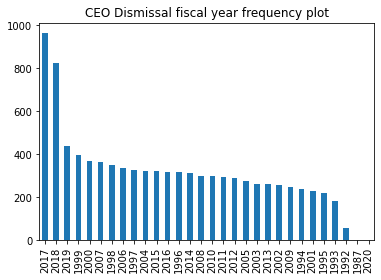

In [71]:
# CEO Dismissal fiscal year frequency plot
ceo_dismissal["fyear"].value_counts().plot.bar(title="CEO Dismissal fiscal year frequency plot")

<AxesSubplot:title={'center':'CEO Dismissal departure fiscal year frequency plot'}>

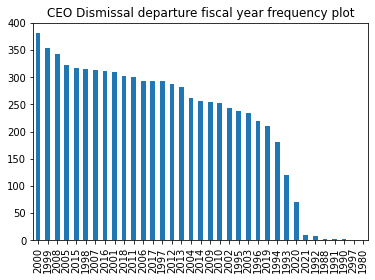

In [72]:
# CEO Dismissal departure fiscal year frequency plot
ceo_dismissal["fyear_gone"].value_counts().plot.bar(title="CEO Dismissal departure fiscal year frequency plot")

<AxesSubplot:title={'center':'CEO Dismissal departure code frequency plot'}>

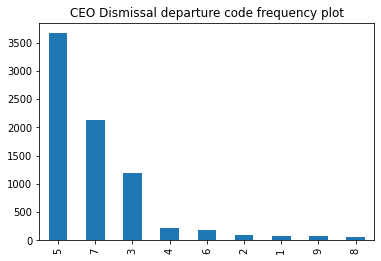

In [73]:
# CEO Dismissal departure code frequency plot
ceo_dismissal["departure_code"].value_counts().plot.bar(title="CEO Dismissal departure code frequency plot")

<AxesSubplot:title={'center':'CEO Dismissal tenure number frequency plot'}>

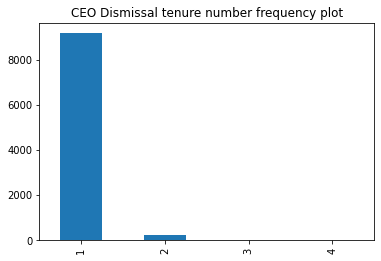

In [74]:
# CEO Dismissal tenure number frequency plot
ceo_dismissal["tenure_no_ceodb"].value_counts().plot.bar(title="CEO Dismissal tenure number frequency plot")

<AxesSubplot:title={'center':'CEO Dismissal max tenures frequency plot'}>

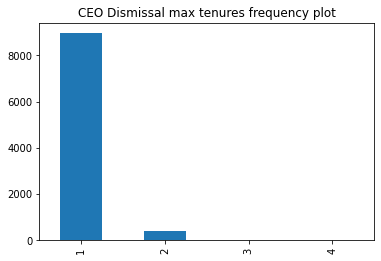

In [75]:
# CEO Dismissal max tenures frequency plot
ceo_dismissal["max_tenure_ceodb"].value_counts().plot.bar(title="CEO Dismissal max tenures frequency plot")